In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Dataset
dataset = pd.read_csv('heart_disease_outlier_handled.csv')

In [3]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40.0,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49.0,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37.0,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48.0,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54.0,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,1
1186,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,1
1187,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1
1188,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1


In [4]:
dataset.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
dataset.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
# Assuming the output column is the last column, split into X (inputs) and y (output)
X = dataset.iloc[:, 0:11]
y = dataset.iloc[:, 11]


In [7]:
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40.0,1,2,140.0,289.0,0,0,172.0,0,0.0,1
1,49.0,0,3,160.0,180.0,0,0,156.0,0,1.0,2
2,37.0,1,2,130.0,283.0,0,1,98.0,0,0.0,1
3,48.0,0,4,138.0,214.0,0,0,108.0,1,1.5,2
4,54.0,1,3,150.0,195.0,0,0,122.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2
1186,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2
1187,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2
1188,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2


In [8]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [9]:
# Train/Test Split
# -------------------------------
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',      # ✅ BEST metric for medical datasets
    cv=5,
    refit=True,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid.fit(X_train, y_train)

# Best estimator
best_rf = grid.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9201680672268907

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       112
           1       0.93      0.92      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238


Confusion Matrix:
 [[103   9]
 [ 10 116]]


Text(0.5, 1.0, 'Top 10 Feature Importances - Random Forest')

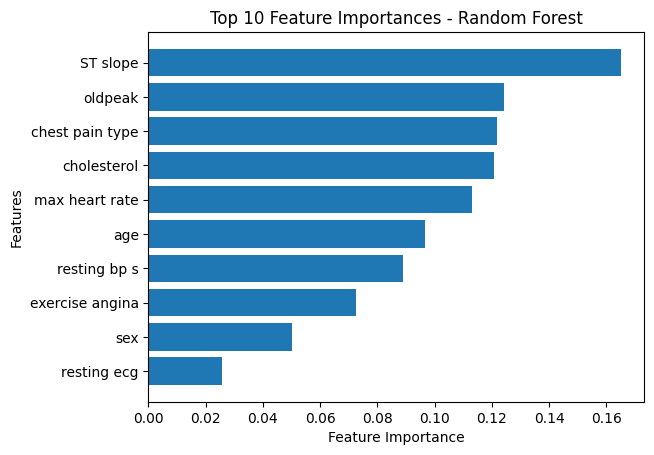

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Plot top 10 features
plt.figure()
plt.barh(
    feature_importance_df['Feature'][:10][::-1],
    feature_importance_df['Importance'][:10][::-1]
)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances - Random Forest")



In [13]:
import pickle

# Save the model
filename = "Heart_Disease_RF_Model.sav"
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

# Load the model
with open("Heart_Disease_RF_Model.sav", 'rb') as file:
    model = pickle.load(file)


In [19]:
import pandas as pd

# Sample patient data (example)
sample_input = {
    'age': 55,
    'sex': 1,
    'chest pain type': 2,
    'resting bp s': 140,
    'cholesterol': 250,
    'fasting blood sugar': 0,
    'resting ecg': 1,
    'max heart rate': 150,
    'exercise angina': 0,
    'oldpeak': 1.5,
    'ST slope': 1
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Predict
prediction = best_rf.predict(sample_df)
probability = best_rf.predict_proba(sample_df)

print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")
print("Probability:", probability)


Prediction: No Heart Disease
Probability: [[0.77895238 0.22104762]]
